In [1]:
using BeamLib: IsotropicArray, steerphi, capon
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steerphi(pa, fc, Θ[1]).*s1 + steerphi(pa, fc, Θ[2]).*s2
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X)[2] * X*X'

# Capon spectrum 
# Same as steering capon_weights / mpdr_weights 
# but using the capon function is more convenient for
# DoA estimation
ϕaxis = LinRange(-90, 90, 360)
P = capon.(Ref(pa), Ref(Rxx), Ref(fc), deg2rad.(ϕaxis))

360-element Vector{Float64}:
 0.34750530197312135
 0.34691284248813675
 0.3451379649554792
 0.34218854245794694
 0.3380788852077444
 0.3328313652375753
 0.3264783864699443
 0.31906442371857907
 0.3106478182241829
 0.30130201608485907
 ⋮
 0.36413425340777184
 0.3551511502639211
 0.34742010795457046
 0.3409295151588348
 0.33565991919505106
 0.33158961227509925
 0.32869848456342604
 0.3269705953852113
 0.32639579176236416

In [2]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(P).indices]

2-element Vector{Float64}:
  9.777158774373248
 79.97214484679665

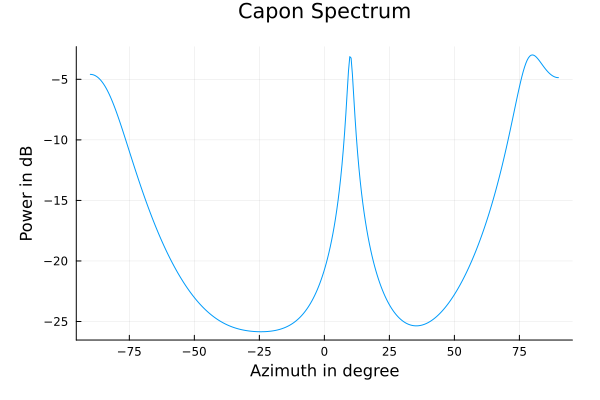

In [3]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(P))
plot!(title="Capon Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")